### Variables para análisis:

In [1]:
pais = 'Colombia'

departamento = 'Caldas'

municipio = ''

variable_buscar = 'Atención'  # puede ser 'Atención' o 'Estado'

estado = 'Hospital UCI'  # Si atención:  ['Recuperado', 'Hospital', 'Hospital UCI', nan, 'Casa']
                   # Si Estado:   ['Leve', 'Asintomático', 'Fallecido', 'Moderado', 'Grave', nan]

ano = '2020'

fechaInicial = '2020-03-02'

fechaFinal = '2020-09-05'

In [2]:
import pandas as pd
pd.set_option("display.precision", 2)
pd.set_option('display.max_rows',100)

from matplotlib import pyplot as plt
#print(plt.style.available)
#plt.style.use('fivethirtyeight')
plt.xkcd()
from textwrap import wrap


In [3]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


## Población mundial por países y proyección 2020  a 2100

In [4]:
#mundo= pd.read_csv('poblacionMundial.csv', usecols= ['Country', '2020', 'Spanish'])

#mundo.set_index('Spanish', inplace=True)
#mundo

## Total casos y número de fallecidos por país

In [5]:
#covMun= pd.read_csv('CovidMundoT.csv', usecols= ['País', 'Total_Casos','Fallecidos'])
#covMun

## Total casos y número de fallecidos Colombia por fecha, departamento, municipio, atención, edad, género, fechas de diagnóstico, recuperación o muerte.

In [6]:
covCol = pd.read_csv('/Users/Dr.LuisEvelioRestrepoGarcia/analisisDane/CovidColombia.csv', usecols= ['Fecha de notificación', 
       'Ciudad de ubicación', 'Departamento o Distrito ', 'atención', 'Edad',
       'Sexo', 'Tipo', 'Estado', 'País de procedencia', 'Fecha recuperado', 'Fecha diagnostico','Fecha de muerte', 
       'Tipo recuperación'], parse_dates = ['Fecha de notificación','Fecha de muerte', 'Fecha diagnostico','Fecha recuperado'], low_memory=False)

covCol['Fecha de muerte'] = pd.to_datetime(covCol['Fecha de muerte'], errors='coerce')

fechas =['Fecha de notificación']
for i in fechas:
    covCol[i] = pd.to_datetime(covCol[i])

cuadro_basico = covCol    
    
covCol

,Fecha de notificación,Ciudad de ubicación,Departamento o Distrito,atención,Edad,Sexo,Tipo,Estado,País de procedencia,Fecha de muerte,Fecha diagnostico,Fecha recuperado,Tipo recuperación
0,2020-03-02,Bogotá D.C.,Bogotá D.C.,Recuperado,19,F,Importado,Leve,ITALIA,NaT,2020-03-06,2020-03-13,PCR
1,2020-03-06,Guadalajara de Buga,Valle del Cauca,Recuperado,34,M,Importado,Leve,ESPAÑA,NaT,2020-03-09,2020-03-19,PCR
2,2020-03-07,Medellín,Antioquia,Recuperado,50,F,Importado,Leve,ESPAÑA,NaT,2020-03-09,2020-03-15,PCR
3,2020-03-09,Medellín,Antioquia,Recuperado,55,M,Relacionado,Leve,NaN,NaT,2020-03-11,2020-03-26,PCR
4,2020-03-09,Medellín,Antioquia,Recuperado,25,M,Relacionado,Leve,NaN,NaT,2020-03-11,2020-03-23,PCR
...,...,...,...,...,...,...,...,...,...,...,...,...,...
666516,2020-08-29,Cali,Valle del Cauca,Casa,86,M,En estudio,Leve,NaN,NaT,2020-08-30,NaT,NaN
666517,2020-08-28,Cali,Valle del Cauca,Casa,58,M,En estudio,Leve,NaN,NaT,2020-08-30,NaT,NaN
666518,2020-08-24,Cali,Valle del Cauca,Casa,38,F,En estudio,Leve,NaN,NaT,2020-08-30,NaT,NaN
666519,2020-08-28,Cali,Valle del Cauca,Casa,68,M,En estudio,Leve,NaN,NaT,2020-08-30,NaT,NaN


### Última fecha de notificación

In [7]:
covCol['Fecha de notificación'].max()

Timestamp('2020-09-05 00:00:00')

In [8]:

filtrofechas = (covCol['Fecha de notificación']>= fechaInicial) & (covCol['Fecha de notificación']<= fechaFinal)
covCol1 = covCol.loc[filtrofechas]
covCol1

,Fecha de notificación,Ciudad de ubicación,Departamento o Distrito,atención,Edad,Sexo,Tipo,Estado,País de procedencia,Fecha de muerte,Fecha diagnostico,Fecha recuperado,Tipo recuperación
0,2020-03-02,Bogotá D.C.,Bogotá D.C.,Recuperado,19,F,Importado,Leve,ITALIA,NaT,2020-03-06,2020-03-13,PCR
1,2020-03-06,Guadalajara de Buga,Valle del Cauca,Recuperado,34,M,Importado,Leve,ESPAÑA,NaT,2020-03-09,2020-03-19,PCR
2,2020-03-07,Medellín,Antioquia,Recuperado,50,F,Importado,Leve,ESPAÑA,NaT,2020-03-09,2020-03-15,PCR
3,2020-03-09,Medellín,Antioquia,Recuperado,55,M,Relacionado,Leve,NaN,NaT,2020-03-11,2020-03-26,PCR
4,2020-03-09,Medellín,Antioquia,Recuperado,25,M,Relacionado,Leve,NaN,NaT,2020-03-11,2020-03-23,PCR
...,...,...,...,...,...,...,...,...,...,...,...,...,...
666516,2020-08-29,Cali,Valle del Cauca,Casa,86,M,En estudio,Leve,NaN,NaT,2020-08-30,NaT,NaN
666517,2020-08-28,Cali,Valle del Cauca,Casa,58,M,En estudio,Leve,NaN,NaT,2020-08-30,NaT,NaN
666518,2020-08-24,Cali,Valle del Cauca,Casa,38,F,En estudio,Leve,NaN,NaT,2020-08-30,NaT,NaN
666519,2020-08-28,Cali,Valle del Cauca,Casa,68,M,En estudio,Leve,NaN,NaT,2020-08-30,NaT,NaN


## Población Colombia por departamento, municipio y género proyectada para el año 2020. 

In [9]:
Col = pd.read_csv('Dane2018_2023.csv').drop(columns = ['2018',
       '2019','2021', '2022', '2023' ])
Col

,Dpto,Municipio,Género,2020
0,Antioquia,Medellín,AMBOS SEXOS,2533424
1,Antioquia,Medellín,HOMBRES,1193791
2,Antioquia,Medellín,MUJERES,1339633
3,Antioquia,Abejorral,AMBOS SEXOS,20287
4,Antioquia,Abejorral,HOMBRES,10558
...,...,...,...,...
3364,Vichada,Cumaribo,HOMBRES,41840
3365,Vichada,Cumaribo,MUJERES,37023
3366,País_Col,País_Col,AMBOS SEXOS,50372424
3367,País_Col,País_Col,HOMBRES,24594882


#### Poblaciones

#### Colombia

In [10]:
Poblacion_pais = 50883000
Poblacion_pais

50883000

#### Total casos COVID-19

In [11]:
total_casos_covid_colombia = covCol1['Fecha de notificación'].count()
total_casos_covid_colombia

666521

#### Total Fallecidos por COVID-19

In [12]:
Fallecidos_pais = covCol1['Fecha de muerte'].count()
Fallecidos_pais

22784

In [13]:
filtro = Col['Género'] == 'AMBOS SEXOS'
Col = Col.loc[filtro, :].drop(columns=['Género'])

Col.set_index(['Dpto', 'Municipio'], inplace=True)

In [14]:
covCol1= covCol1.rename(columns={"Departamento o Distrito ": "Dpto", "Ciudad de ubicación": "Municipio", "atención":"Atención", "Fecha diagnostico":"Fecha diagnóstico"})

In [15]:
covCol1.set_index(['Dpto', 'Municipio'], inplace = True)

#### Casos y poblaciones por departamento y municipio

In [16]:
Tasas = pd.merge(covCol1, Col, left_index=True, right_index=True).reset_index()

Tasas

,Dpto,Municipio,Fecha de notificación,Atención,Edad,Sexo,Tipo,Estado,País de procedencia,Fecha de muerte,Fecha diagnóstico,Fecha recuperado,Tipo recuperación,2020
0,Amazonas,Leticia,2020-04-14,Recuperado,26,M,Relacionado,Leve,NaN,NaT,2020-04-17,2020-05-19,PCR,49737
1,Amazonas,Leticia,2020-04-13,Recuperado,47,F,Importado,Leve,BRASIL,NaT,2020-04-18,2020-05-31,Tiempo,49737
2,Amazonas,Leticia,2020-04-14,Recuperado,16,F,Relacionado,Leve,NaN,NaT,2020-04-18,2020-05-29,PCR,49737
3,Amazonas,Leticia,2020-04-14,Recuperado,41,F,Importado,Leve,BRASIL,NaT,2020-04-18,2020-05-29,PCR,49737
4,Amazonas,Leticia,2020-04-16,Recuperado,54,M,Relacionado,Leve,NaN,NaT,2020-04-21,2020-04-29,PCR,49737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637665,Vichada,Puerto Carreño,2020-08-25,Casa,37,M,En estudio,Leve,NaN,NaT,2020-09-05,NaT,NaN,20294
637666,Vichada,Puerto Carreño,2020-08-25,Casa,23,M,En estudio,Leve,NaN,NaT,2020-09-05,NaT,NaN,20294
637667,Vichada,Puerto Carreño,2020-08-25,Casa,24,M,En estudio,Leve,NaN,NaT,2020-09-05,NaT,NaN,20294
637668,Vichada,Puerto Carreño,2020-08-25,Casa,35,M,En estudio,Leve,NaN,NaT,2020-09-05,NaT,NaN,20294


#### Municipios con casos reportados por SARS CoV-2 a:

In [17]:
pd.Timestamp.today()

Timestamp('2020-09-08 16:28:32.275945')

In [18]:
Tasas['Municipio'].unique()



array(['Leticia', 'Puerto Nariño', 'Abejorral', 'Abriaquí', 'Alejandría',
       'Amagá', 'Amalfi', 'Andes', 'Angelópolis', 'Angostura', 'Anorí',
       'Apartadó', 'Arboletes', 'Argelia', 'Armenia', 'Barbosa', 'Bello',
       'Belmira', 'Betania', 'Betulia', 'Briceño', 'Buriticá', 'Caicedo',
       'Caldas', 'Campamento', 'Caracolí', 'Caramanta', 'Carepa',
       'Carolina', 'Caucasia', 'Cañasgordas', 'Chigorodó', 'Cisneros',
       'Ciudad Bolívar', 'Cocorná', 'Concepción', 'Concordia',
       'Copacabana', 'Cáceres', 'Dabeiba', 'Ebéjico', 'El Bagre',
       'El Carmen de Viboral', 'El Santuario', 'Envigado', 'Fredonia',
       'Frontino', 'Giraldo', 'Girardota', 'Granada', 'Guadalupe',
       'Guarne', 'Guatapé', 'Gómez Plata', 'Heliconia', 'Hispania',
       'Ituango', 'Jardín', 'Jericó', 'La Ceja', 'La Estrella',
       'La Pintada', 'La Unión', 'Liborina', 'Maceo', 'Marinilla',
       'Medellín', 'Montebello', 'Murindó', 'Mutatá', 'Nechí', 'Necoclí',
       'Olaya', 'Peque', 'Peñ

In [19]:
Casos_a_Fecha = Tasas.groupby(['Dpto', 'Municipio'])[['Fecha de notificación', 'Fecha de muerte',
        'Fecha recuperado']].count().loc[[departamento, municipio]]

In [20]:
Cuadro_Tasas = pd.merge(Casos_a_Fecha, Col, left_index=True, right_index=True)

In [21]:
Cuadro_Tasas.rename({'Fecha de notificación':'Total casos', 
                     'Fecha de muerte':'Fallecidos', 
                     'Fecha recuperado': 'Recuperados', 
                     '2020': 'Población'}, axis = 'columns', inplace=True)

In [22]:
Cuadro_Tasas['Tasa de letalidad por 100 habitantes'] = (Cuadro_Tasas['Fallecidos']/Cuadro_Tasas['Total casos'])*100
Cuadro_Tasas['Tasa de mortalidad por 100.000 habitantes'] = (Cuadro_Tasas['Fallecidos']/Cuadro_Tasas['Población'])*100000

#### Tasas de letalidad y de mortalidad por Departamento o Municipio

In [23]:
Cuadro_Tasas

Total casos  Fallecidos  Recuperados  Población  \
Dpto   Municipio                                                      
Caldas Manizales           1789          45         1106     446160   
       Anserma               62           0           28      36691   
       Palestina             11           1            2      15681   
       Chinchiná            201           5          131      52267   
       Supía                 99           5           66      29363   
       Pácora                10           0            4      15324   
       Filadelfia             1           0            0      11400   
       Pensilvania            1           0            1      19755   
       Norcasia               3           2            0       6128   
       Neira                 28           4           18      21114   
       Belalcázar            28           0           23      10650   
       San José               3           2            0       4916   
       Marmato              144           0          100       9167   
       Villamaría           138           6           85      67429   
       Samaná                 6           0            5      19967   
       Salamina               8           1            7      19393   
       Riosucio              98           3           62      51956   
       La Merced             12           0            8       5882   
       Aguadas               72           0           62      23048   
       Manzanares            26           1           19      17794   
       Risaralda             12           0            5      10568   
       Marquetalia           10           0            9      13490   
       Aranzazu               5           0            5      10556   
       Victoria               6           0            1      10351   
       Viterbo               32           2           16      12853   
       La Dorada            591          15          394      74006   

                    Tasa de letalidad por 100 habitantes  \
Dpto   Municipio                                           
Caldas Manizales                                    2.52   
       Anserma                                      0.00   
       Palestina                                    9.09   
       Chinchiná                                    2.49   
       Supía                                        5.05   
       Pácora                                       0.00   
       Filadelfia                                   0.00   
       Pensilvania                                  0.00   
       Norcasia                                    66.67   
       Neira                                       14.29   
       Belalcázar                                   0.00   
       San José                                    66.67   
       Marmato                                      0.00   
       Villamaría                                   4.35   
       Samaná                                       0.00   
       Salamina                                    12.50   
       Riosucio                                     3.06   
       La Merced                                    0.00   
       Aguadas                                      0.00   
       Manzanares                                   3.85   
       Risaralda                                    0.00   
       Marquetalia                                  0.00   
       Aranzazu                                     0.00   
       Victoria                                     0.00   
       Viterbo                                      6.25   
       La Dorada                                    2.54   

                    Tasa de mortalidad por 100.000 habitantes  
Dpto   Municipio                                               
Caldas Manizales                                        10.09  
       Anserma                                           0.00  
       Palestina                                         6.38  
       Chinchiná              

In [24]:
if departamento == '' and municipio== '':
    print('Debe ingresar mínimo el Departamento.  Inténtelo nuevamente')
    pass
else:
    if municipio == '':
        Total_casos = Cuadro_Tasas.loc[departamento, 'Total casos'].astype(int) 
        Fallecidos_dpto_munic = Cuadro_Tasas.loc[(departamento), 'Fallecidos'].astype(int)
        Poblacion_dpto_munic = Cuadro_Tasas.loc[(departamento), 'Población'].astype(int)
    
    else:
        Total_casos = Cuadro_Tasas.loc[(departamento, municipio), 'Total casos'].astype(int)
        Fallecidos_dpto_munic = Cuadro_Tasas.loc[(departamento, municipio), 'Fallecidos'].astype(int)
        Poblacion_dpto_munic = Cuadro_Tasas.loc[(departamento, municipio), 'Población'].astype(int)
    

In [25]:
#total_casos_covid_colombia

#### Fallecidos por municipio

In [26]:
Fallecidos_dpto_munic    

Municipio
Manizales      45
Anserma         0
Palestina       1
Chinchiná       5
Supía           5
Pácora          0
Filadelfia      0
Pensilvania     0
Norcasia        2
Neira           4
Belalcázar      0
San José        2
Marmato         0
Villamaría      6
Samaná          0
Salamina        1
Riosucio        3
La Merced       0
Aguadas         0
Manzanares      1
Risaralda       0
Marquetalia     0
Aranzazu        0
Victoria        0
Viterbo         2
La Dorada      15
Name: Fallecidos, dtype: int64

#### Población por municipio  (municipios afectados por CoV-2)

In [27]:
#Fallecidos_pais

In [28]:
Poblacion_dpto_munic

Municipio
Manizales      446160
Anserma         36691
Palestina       15681
Chinchiná       52267
Supía           29363
Pácora          15324
Filadelfia      11400
Pensilvania     19755
Norcasia         6128
Neira           21114
Belalcázar      10650
San José         4916
Marmato          9167
Villamaría      67429
Samaná          19967
Salamina        19393
Riosucio        51956
La Merced        5882
Aguadas         23048
Manzanares      17794
Risaralda       10568
Marquetalia     13490
Aranzazu        10556
Victoria        10351
Viterbo         12853
La Dorada       74006
Name: Población, dtype: int64

#### Total población en áreas afectadas del departamento o municipio

In [29]:
Poblacion_dpto_munic.sum()

1015909

#### Población Departamental o Municipal 

In [30]:
poblacionDpto = Col.loc[(departamento),'2020'].sum()
poblacionDpto

1018453

In [31]:
#Poblacion_pais

#### Casos por municipio

In [32]:
Total_casos

Municipio
Manizales      1789
Anserma          62
Palestina        11
Chinchiná       201
Supía            99
Pácora           10
Filadelfia        1
Pensilvania       1
Norcasia          3
Neira            28
Belalcázar       28
San José          3
Marmato         144
Villamaría      138
Samaná            6
Salamina          8
Riosucio         98
La Merced        12
Aguadas          72
Manzanares       26
Risaralda        12
Marquetalia      10
Aranzazu          5
Victoria          6
Viterbo          32
La Dorada       591
Name: Total casos, dtype: int64

#### Casos en el departamento

In [33]:
Total_casos_dpto = Total_casos.sum()

Total_casos_dpto

3396

#### Resumen situacional

In [34]:
hoy = pd.Timestamp.today()


In [35]:
filtro= Tasas[variable_buscar]== estado
if municipio == '':
    Cuadro_filtrados = Tasas.loc[filtro, 'Atención': 'Tipo recuperación'].loc[(Tasas['Dpto'] == departamento)]
    numero_estados= Cuadro_filtrados.loc[:, variable_buscar].count()
    print('Según datos reportados al ', hoy, ' por el INS Colombiano, de los ' + str(Total_casos_dpto)
          + ' casos de '+ departamento + ', ' + str(numero_estados) +' casos, es decir el '
          + str(((numero_estados/Total_casos_dpto)*100).round(2))+' %, está en condición: '
          + variable_buscar + ' ' + estado + ' y representan el ' 
          + str(((numero_estados/Col.loc[(departamento),'2020'].sum())*100).round(6)) 
          + ' %  de los '+ str(Col.loc[(departamento),'2020'].sum()) + ' habitantes de ' + departamento)
   
    print('La tasa de mortalidad en los municipios del Departamento de ' + departamento + ' por cien mil habitantes es: '
          + str(((Fallecidos_dpto_munic/poblacionDpto)*100000).round(2)))
    
    print('La tasa de letalidad en los municipios del Departamento de ' + departamento + 
          ' por cien enfermos de CoVid-19, es: ' + str(((Fallecidos_dpto_munic/Total_casos)*100).round(2)))

else:
    Cuadro_filtrados = Tasas.loc[filtro, 'Atención': 'Tipo recuperación'].loc[(Tasas['Dpto'] == departamento) & (Tasas['Municipio']== municipio)]
    numero_estados= Cuadro_filtrados.loc[:, variable_buscar].count()
    print('Según datos reportados al', hoy, 'por el INS Colombiano, de los ' + str(Total_casos) + ' casos de '+ municipio + ', ' 
          + str(numero_estados) +' casos, es decir el '+ str(((numero_estados/Total_casos)*100).round(2))
          +' %, están en '+ variable_buscar + ': ' + estado + ' y representan el '
          + str(((numero_estados/Poblacion_dpto_munic.sum())*100).round(6)) 
          + ' % de los ' + str(Poblacion_dpto_munic.sum()) + ' habitantes de ' + municipio +'.','\n')
    
    print('La tasa de letalidad en el municipio de '+ municipio + ',' + ' Departamento de ' 
          + departamento + ' es de ' + str(((Fallecidos_dpto_munic/Total_casos)*100).round(2)) 
          + ' por cien enfermos de CoVid-19.','\n')
    
    print('La tasa de mortalidad en el municipio de '+ municipio + ',' + ' Departamento de ' 
          + departamento + ' es de ' + str(((Fallecidos_dpto_munic/Poblacion_dpto_munic)*100000).round(2)) 
          + ' por cien mil habitantes.','\n')
    
print('La tasa de mortalidad de ' + pais+ ' por CoV-2 ' + 'es de ' + str(((Fallecidos_pais/Poblacion_pais)*1000000).round(1))+ ' por millón de habitantes.','\n')

print('La tasa de letalidad de '+pais+ ' por CoV-2 ' + 'es de ' + str(((Fallecidos_pais/total_casos_covid_colombia)*100).round(2))+ ' por cien enfermos de CoVid-19.','\n')

Según datos reportados al  2020-09-08 16:28:32.816415  por el INS Colombiano, de los 3396 casos de Caldas, 3 casos, es decir el 0.09 %, está en condición: Atención Hospital UCI y representan el 0.000295 %  de los 1018453 habitantes de Caldas
La tasa de mortalidad en los municipios del Departamento de Caldas por cien mil habitantes es: Municipio
Manizales      4.42
Anserma        0.00
Palestina      0.10
Chinchiná      0.49
Supía          0.49
Pácora         0.00
Filadelfia     0.00
Pensilvania    0.00
Norcasia       0.20
Neira          0.39
Belalcázar     0.00
San José       0.20
Marmato        0.00
Villamaría     0.59
Samaná         0.00
Salamina       0.10
Riosucio       0.29
La Merced      0.00
Aguadas        0.00
Manzanares     0.10
Risaralda      0.00
Marquetalia    0.00
Aranzazu       0.00
Victoria       0.00
Viterbo        0.20
La Dorada      1.47
Name: Fallecidos, dtype: float64
La tasa de letalidad en los municipios del Departamento de Caldas por cien enfermos de CoVid-19, es:

In [36]:
Cuadro_Tasas.columns


Index(['Total casos', 'Fallecidos', 'Recuperados', 'Población',
       'Tasa de letalidad por 100 habitantes',
       'Tasa de mortalidad por 100.000 habitantes'],
      dtype='object')

In [37]:
%matplotlib inline

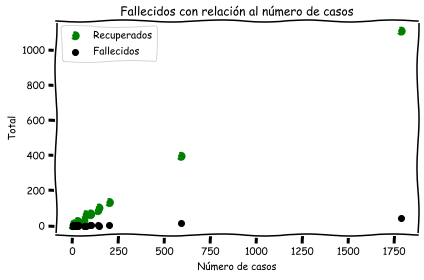

In [38]:
casos = Cuadro_Tasas['Total casos']

y = Cuadro_Tasas['Recuperados']

dev_x = casos
dev_y = y

plt.scatter(casos, dev_y, color= 'g', linestyle = '--', linewidth= 3, label='Recuperados')

y1= Cuadro_Tasas['Fallecidos']

plt.scatter(casos, y1, color ='k', linewidth=1, label= 'Fallecidos')


plt.title('Fallecidos con relación al número de casos')
plt.xlabel('Número de casos')
plt.ylabel('Total')
plt.legend()
#plt.grid(True)

plt.tight_layout()
#plt.savefig('figure.png')
plt.show()

In [39]:
cuadro_basico

,Fecha de notificación,Ciudad de ubicación,Departamento o Distrito,atención,Edad,Sexo,Tipo,Estado,País de procedencia,Fecha de muerte,Fecha diagnostico,Fecha recuperado,Tipo recuperación
0,2020-03-02,Bogotá D.C.,Bogotá D.C.,Recuperado,19,F,Importado,Leve,ITALIA,NaT,2020-03-06,2020-03-13,PCR
1,2020-03-06,Guadalajara de Buga,Valle del Cauca,Recuperado,34,M,Importado,Leve,ESPAÑA,NaT,2020-03-09,2020-03-19,PCR
2,2020-03-07,Medellín,Antioquia,Recuperado,50,F,Importado,Leve,ESPAÑA,NaT,2020-03-09,2020-03-15,PCR
3,2020-03-09,Medellín,Antioquia,Recuperado,55,M,Relacionado,Leve,NaN,NaT,2020-03-11,2020-03-26,PCR
4,2020-03-09,Medellín,Antioquia,Recuperado,25,M,Relacionado,Leve,NaN,NaT,2020-03-11,2020-03-23,PCR
...,...,...,...,...,...,...,...,...,...,...,...,...,...
666516,2020-08-29,Cali,Valle del Cauca,Casa,86,M,En estudio,Leve,NaN,NaT,2020-08-30,NaT,NaN
666517,2020-08-28,Cali,Valle del Cauca,Casa,58,M,En estudio,Leve,NaN,NaT,2020-08-30,NaT,NaN
666518,2020-08-24,Cali,Valle del Cauca,Casa,38,F,En estudio,Leve,NaN,NaT,2020-08-30,NaT,NaN
666519,2020-08-28,Cali,Valle del Cauca,Casa,68,M,En estudio,Leve,NaN,NaT,2020-08-30,NaT,NaN


In [40]:
cuadro_basico.columns

Index(['Fecha de notificación', 'Ciudad de ubicación',
       'Departamento o Distrito ', 'atención', 'Edad', 'Sexo', 'Tipo',
       'Estado', 'País de procedencia', 'Fecha de muerte', 'Fecha diagnostico',
       'Fecha recuperado', 'Tipo recuperación'],
      dtype='object')

In [41]:
cuadro_basico.index

RangeIndex(start=0, stop=666521, step=1)

In [42]:
cuadro_basico.sort_values(by= ['Fecha de notificación'], inplace=True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


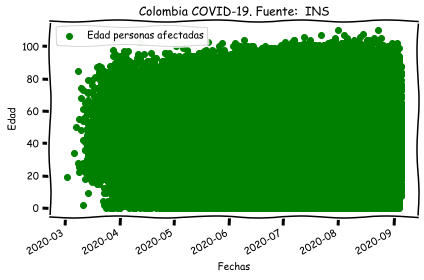

In [43]:
x = cuadro_basico['Fecha de notificación']

y = cuadro_basico['Edad']

dev_x = x
dev_y = y

#plt.plot_date(dev_x, dev_y, color= 'g', linestyle = '--', linewidth= 3, label='Recuperados')
plt.scatter(dev_x, dev_y, color= 'g', label='Edad personas afectadas')

plt.gcf().autofmt_xdate()
#y1= Cuadro_Tasas['Fallecidos']

#plt.scatter(dev_x, y1, color ='k', linewidth=1, label= 'Fallecidos')


plt.title('Colombia COVID-19. Fuente:  INS')

plt.xlabel('Fechas')
plt.ylabel('Edad')
plt.legend()
#plt.grid(True)

plt.tight_layout()
#plt.savefig('figure.png')
plt.show()